In [1]:
# 로그 선형 모형
library(MASS)
data(Traffic)

In [2]:
t(Traffic)

,1,2,3,4,5,6,7,8,9,10,⋯,175,176,177,178,179,180,181,182,183,184
year,1961,1961,1961,1961,1961,1961,1961,1961,1961,1961,⋯,1962,1962,1962,1962,1962,1962,1962,1962,1962,1962
day,1,2,3,4,5,6,7,8,9,10,⋯,83,84,85,86,87,88,89,90,91,92
limit,no,no,no,no,no,no,no,no,no,no,⋯,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
y,9,11,9,20,31,26,18,19,18,13,⋯,16,15,12,22,24,16,25,14,15,9


In [3]:
Traffic$day <- as.factor(Traffic$day)
Traffic$year <- as.factor(Traffic$year)
log.lm <- glm(y~limit+day+year, family=poisson(link=log), data=Traffic)
log.lm.summary <- summary(log.lm)
log.lm.summary


Call:
glm(formula = y ~ limit + day + year, family = poisson(link = log), 
    data = Traffic)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.04107  -0.54181  -0.00118   0.51828   1.93570  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.20984    0.23632   9.351  < 2e-16 ***
limityes    -0.28424    0.04300  -6.610 3.86e-11 ***
day2         0.54362    0.29633   1.834 0.066584 .  
day3         0.28768    0.31180   0.923 0.356197    
day4         0.63599    0.29149   2.182 0.029121 *  
day5         1.22050    0.26823   4.550 5.36e-06 ***
day6         1.00145    0.27562   3.634 0.000280 ***
day7         0.60614    0.29302   2.069 0.038583 *  
day8         0.60614    0.29302   2.069 0.038583 *  
day9         0.63599    0.29149   2.182 0.029121 *  
day10        0.60614    0.29302   2.069 0.038583 *  
day11        1.06853    0.27869   3.834 0.000126 ***
day12        1.38303    0.26795   5.161 2.45e-07 ***
day13        1.02408   

In [4]:
t(log.lm.summary$coefficients)

,(Intercept),limityes,day2,day3,day4,day5,day6,day7,day8,day9,⋯,day84,day85,day86,day87,day88,day89,day90,day91,day92,year1962
Estimate,2.209837e+00,-2.842374e-01,0.54361545,0.2876821,0.63598877,1.220502e+00,1.0014485402,0.60613580,0.60613580,0.63598877,⋯,0.823410682,0.53572861,0.903453390,1.0240813775,0.92877120,1.247225e+00,0.903453390,0.3753860,0.64108913,-0.02538581
Std. Error,2.363198e-01,4.300428e-02,0.29633360,0.3118048,0.29149154,2.682331e-01,0.2756151643,0.29301636,0.29301636,0.29149154,⋯,0.289316768,0.30489908,0.285600127,0.2804526430,0.28447568,2.722283e-01,0.285600140,0.3152841,0.29876369,0.03458390
z value,9.351046e+00,-6.609514e+00,1.83447117,0.9226352,2.18184294,4.550155e+00,3.6335030498,2.06860739,2.06860739,2.18184294,⋯,2.846052402,1.75706861,3.163350796,3.6515304917,3.26485268,4.581541e+00,3.163350654,1.1906275,2.14580668,-0.73403543
Pr(>|z|),8.678494e-21,3.855836e-11,0.06658408,0.3561973,0.02912113,5.360650e-06,0.0002795991,0.03858294,0.03858294,0.02912113,⋯,0.004426491,0.07890612,0.001559643,0.0002606821,0.00109521,4.615626e-06,0.001559644,0.2337999,0.03188841,0.46292714


In [6]:
#연도가 유의하지 않으니 뺴고 계산한다(왜냐하면 p-value가 0.46으로 0.05보다 크므로)
log.lm1 <- glm(y~limit+day, family=poisson(link=log), data=Traffic)
log.lm1.summary <- summary(log.lm1)
log.lm1.summary


Call:
glm(formula = y ~ limit + day, family = poisson(link = log), 
    data = Traffic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0984  -0.5454   0.0000   0.5206   2.0150  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.19722    0.23570   9.322  < 2e-16 ***
limityes    -0.29627    0.03978  -7.448 9.46e-14 ***
day2         0.54362    0.29633   1.834 0.066584 .  
day3         0.28768    0.31180   0.923 0.356197    
day4         0.63599    0.29149   2.182 0.029121 *  
day5         1.22050    0.26823   4.550 5.36e-06 ***
day6         1.00145    0.27562   3.634 0.000280 ***
day7         0.60614    0.29302   2.069 0.038583 *  
day8         0.60614    0.29302   2.069 0.038583 *  
day9         0.63599    0.29149   2.182 0.029121 *  
day10        0.60614    0.29302   2.069 0.038583 *  
day11        1.07547    0.27854   3.861 0.000113 ***
day12        1.38996    0.26780   5.190 2.10e-07 ***
day13        1.03102    0.28030   3.678 

In [8]:
t(log.lm1.summary$coefficients)

,(Intercept),limityes,day2,day3,day4,day5,day6,day7,day8,day9,⋯,day83,day84,day85,day86,day87,day88,day89,day90,day91,day92
Estimate,2.197225e+00,-2.962658e-01,0.54361545,0.2876821,0.63598877,1.220502e+00,1.0014485402,0.60613580,0.60613580,0.63598877,⋯,1.254163e+00,0.83034830,0.54266623,0.910391010,1.0310189975,0.9357088177,1.254163e+00,0.910391010,0.3823236,0.64802675
Std. Error,2.357023e-01,3.977692e-02,0.29633361,0.3118048,0.29149154,2.682331e-01,0.2756151644,0.29301636,0.29301636,0.29149154,⋯,2.720756e-01,0.28917313,0.30476279,0.285454623,0.2803044652,0.2843296013,2.720756e-01,0.285454633,0.3151524,0.29862460
z value,9.322034e+00,-7.448184e+00,1.83447112,0.9226352,2.18184294,4.550155e+00,3.6335030497,2.06860739,2.06860739,2.18184294,⋯,4.609610e+00,2.87145731,1.78061838,3.189267005,3.6782111086,3.2909300104,4.609610e+00,3.189266885,1.2131386,2.17003807
Pr(>|z|),1.141306e-20,9.463349e-14,0.06658409,0.3561973,0.02912113,5.360650e-06,0.0002795991,0.03858294,0.03858294,0.02912113,⋯,4.034242e-06,0.00408584,0.07497481,0.001426341,0.0002348755,0.0009985675,4.034245e-06,0.001426341,0.2250768,0.03000396


In [12]:
AIC(log.lm)
log.lm1$aic

#AIC값이 작아진걸 확인할 수 있음

[1] 1185.061

[1] 1183.6

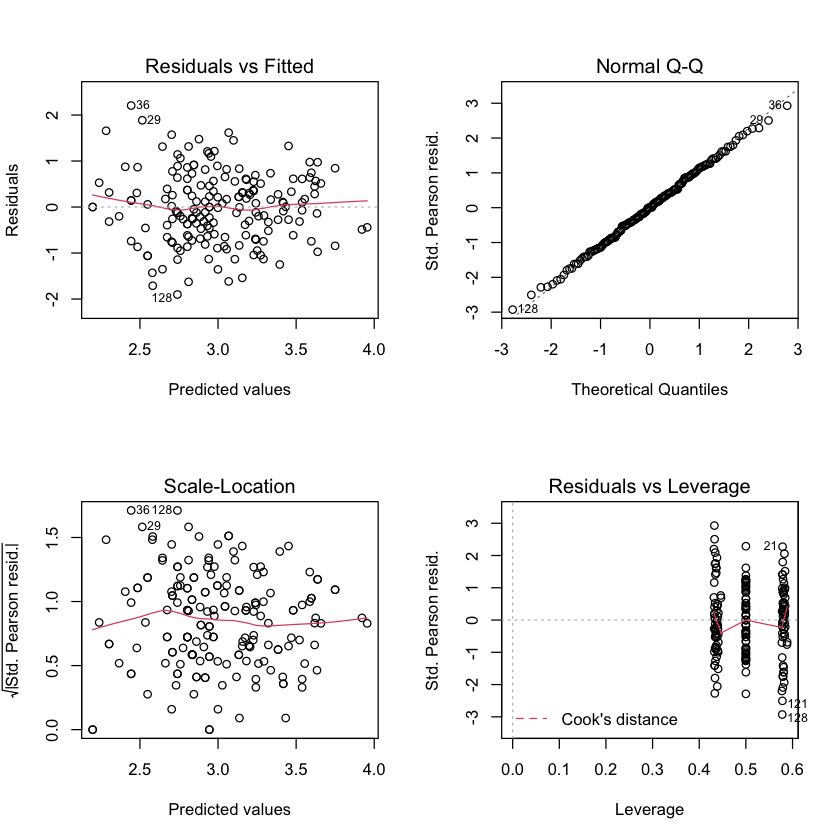

In [13]:
# 로그선형모형의 잔차진단
par(mfrow=c(2,2))
plot(log.lm1)